/Users/riandwi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/70
938/938 [==============================] - 24s 25ms/step - loss: 1.1916 - accuracy: 0.5555 - val_loss: 0.7459 - val_accuracy: 0.7164
Epoch 2/70
938/938 [==============================] - 28s 29ms/step - loss: 0.8236 - accuracy: 0.6984 - val_loss: 0.6028 - val_accuracy: 0.7637
Epoch 3/70
938/938 [==============================] - 26s 28ms/step - loss: 0.7426 - accuracy: 0.7282 - val_loss: 0.5721 - val_accuracy: 0.7728
Epoch 4/70
938/938 [==============================] - 28s 29ms/step - loss: 0.6923 - accuracy: 0.7504 - val_loss: 0.5523 - val_accuracy: 0.7885
Epoch 5/70
938/938 [==============================] - 28s 29ms/step - loss: 0.6656 - accuracy: 0.7603 - val_loss: 0.5246 - val_accuracy: 0.7928
Epoch 6/70
938/938 [==============================] - 26s 27ms/step - loss: 0.6415 - accuracy: 0.7689 - val_loss: 0.5292 - val_accuracy: 0.7999
Epoch 7/70
938/938 [==============================] - 25s 27ms/step - loss: 0.6166 - accuracy: 0.7791 - val_loss: 0.4732 - val_accuracy:

/Users/riandwi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


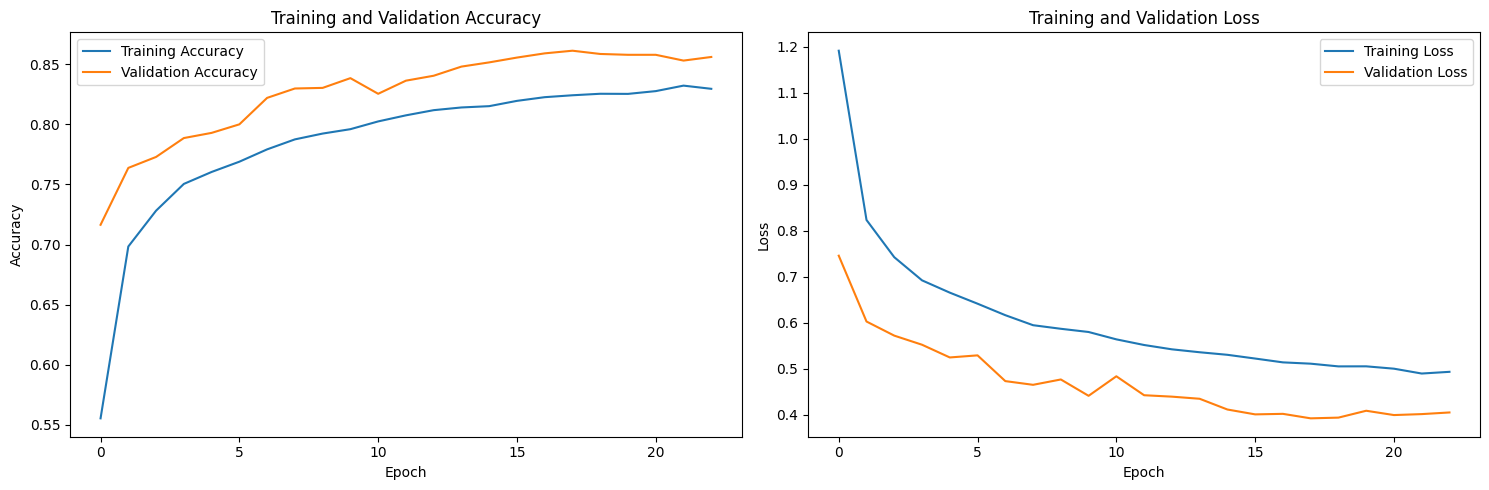

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Added another convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Increased units to 128
    Dropout(0.5),
    Dense(64, activation='relu'),   # Added another fully connected layer
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),  # Lowered learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=15,  # Increased rotation range
                             width_shift_range=0.15,  # Added width shift range
                             height_shift_range=0.15,  # Added height shift range
                             shear_range=0.15,  # Added shear range
                             zoom_range=0.15,   # Added zoom range
                             horizontal_flip=True) # Added horizontal flip
datagen.fit(train_images) # Fit the data generator

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=70,  # Increased number of epochs
                    validation_data=(test_images, test_labels), # Added validation data
                    callbacks=[early_stopping]) # Added early stopping

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Save the trained model
model.save('Dataset/fashion_mnist_model_improved.h5')

# Plotting the accuracy and loss
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()